In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('million_song_subset.csv',sep='###')
df.drop(['time_signature','duration'],axis=1)
pd.options.display.max_columns = 10
df.head()

/tmp/ipykernel_557427/3928320442.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('million_song_subset.csv',sep='###')


,song_id,song_title,duration,year,danceability,...,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12
0,b'SORKXVV12A8C134C70',b'Price I Pay',327.15710,2003,0.0,...,-1.702527,6.041472,-1.016402,-1.799413,-8.479166
1,b'SOVFWRR12A58A7C25E',b'Never Again (Album Version)',189.20444,0,0.0,...,1.054028,9.386285,8.002425,3.091476,4.317224
2,b'SONTDOE12AAFF4446C',b'Earth Child (World)',225.72363,1999,0.0,...,-6.632973,15.295603,-0.679436,-3.232442,-2.680127
3,b'SOPXZIE12AB017C4D4',b'Master_ Faster_ Sweet Desaster',207.77751,1999,0.0,...,-11.974122,-3.882522,1.861458,0.860511,-5.662918
4,b'SOQSCFU12A8C13DAC3',b'Silent Night (Featuring Geoffrey Jones_ Terr...,235.65016,0,0.0,...,1.361620,-8.491832,3.117790,2.387131,7.808582


In [30]:
df.columns

Index(['song_id', 'song_title', 'duration', 'year', 'danceability', 'energy',
       'loudness', 'tempo', 'time_signature', 'segment_loudness_avg',
       'chroma1', 'chroma2', 'chroma3', 'chroma4', 'chroma5', 'chroma6',
       'chroma7', 'chroma8', 'chroma9', 'chroma10', 'chroma11', 'chroma12',
       'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12'],
      dtype='object')

In [31]:
df.dtypes

song_id                  object
song_title               object
duration                float64
year                      int64
danceability            float64
energy                  float64
loudness                float64
tempo                   float64
time_signature            int64
segment_loudness_avg    float64
chroma1                 float64
chroma2                 float64
chroma3                 float64
chroma4                 float64
chroma5                 float64
chroma6                 float64
chroma7                 float64
chroma8                 float64
chroma9                 float64
chroma10                float64
chroma11                float64
chroma12                float64
MFCC1                   float64
MFCC2                   float64
MFCC3                   float64
MFCC4                   float64
MFCC5                   float64
MFCC6                   float64
MFCC7                   float64
MFCC8                   float64
MFCC9                   float64
MFCC10  

/home/avisouser/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/avisouser/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/avisouser/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='year', ylabel='duration'>,
        <AxesSubplot:xlabel='danceability', ylabel='duration'>, ...,
        <AxesSubplot:xlabel='MFCC10', ylabel='duration'>,
        <AxesSubplot:xlabel='MFCC11', ylabel='duration'>,
        <AxesSubplot:xlabel='MFCC12', ylabel='duration'>],
       [<AxesSubplot:xlabel='duration', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='danceability', ylabel='year'>, ...,
        <AxesSubplot:xlabel='MFCC10', ylabel='year'>,
        <AxesSubplot:xlabel='MFCC11', ylabel='year'>,
        <AxesSubplot:xlabel='MFCC12', ylabel='year'>],
       [<AxesSubplot:xlabel='duration', ylabel='danceability'>,
        <AxesSubplot:xlabel='year', ylabel='danceability'>,
        <AxesSubplot:xlabel='danceability', ylabel='danceability'>, ...,
        <AxesSubplot:xlabel='MFCC10', ylabel='danceability'>,
        <AxesSubplot:xlabel='MFCC11', ylabel=

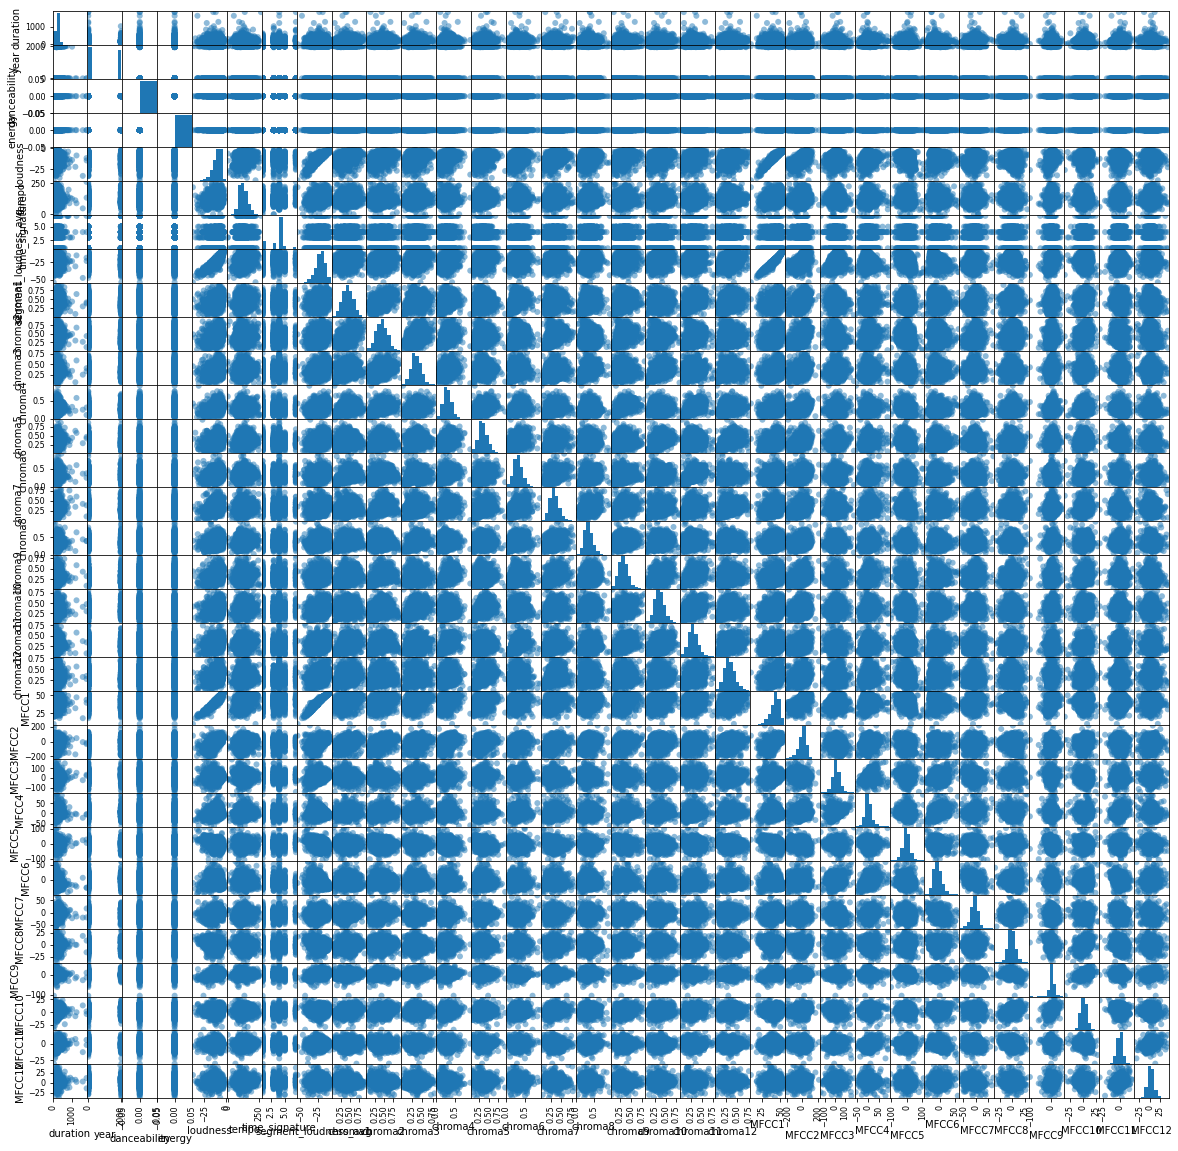

In [23]:
pd.plotting.scatter_matrix(df,figsize=(20,20),grid=True,marker='o')

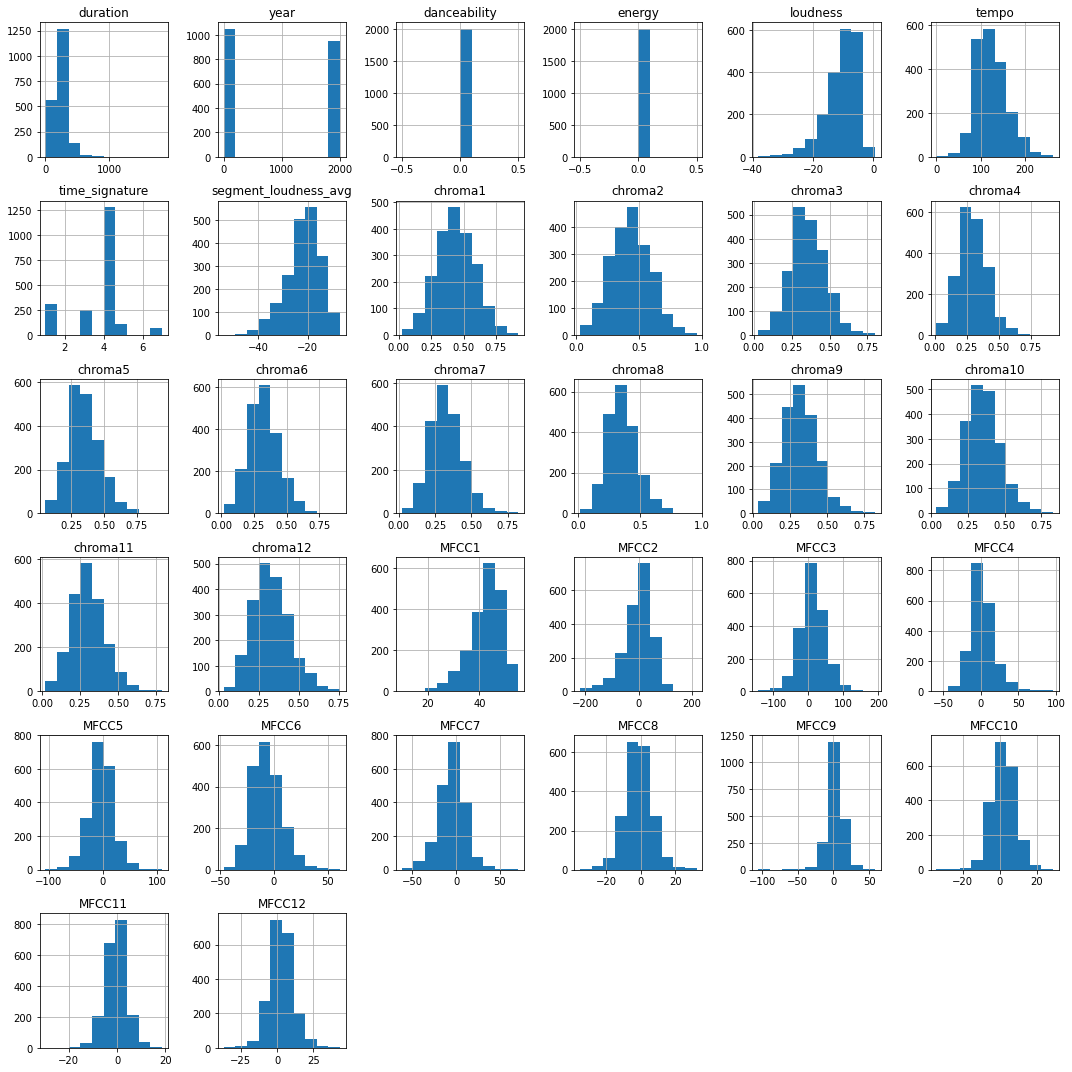

In [26]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

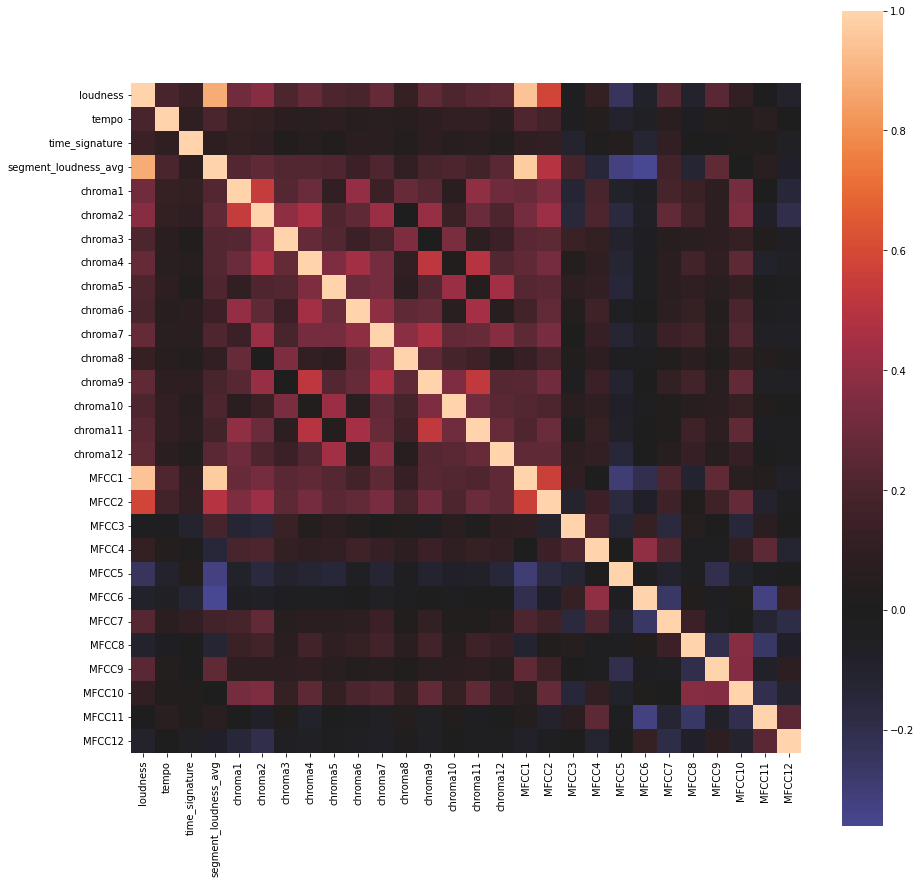

In [39]:
df1 = df.drop(['duration','year','energy','danceability'] , axis=1)
import seaborn as sns
plt.gcf().set_size_inches(15, 15)
cmap=sns.diverging_palette(500,10,as_cmap=True)
sns.heatmap(df1.corr(),center=0,annot=False,square=True)
plt.show()

In [49]:
##scaling data using standard scaler
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
data_final = df1.drop(['song_id','song_title'] , axis=1)
model = scaler.fit(data_final)
scaled_data = model.transform(data_final)
type(scaled_data)

numpy.ndarray

In [51]:
data_scaled = pd.DataFrame(scaled_data,columns=['loudness', 'tempo', 'time_signature', 'segment_loudness_avg',
       'chroma1', 'chroma2', 'chroma3', 'chroma4', 'chroma5', 'chroma6',
       'chroma7', 'chroma8', 'chroma9', 'chroma10', 'chroma11', 'chroma12',
       'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12'])
data_scaled.head()

,loudness,tempo,time_signature,segment_loudness_avg,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,...,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12
0,0.850183,0.527558,0.500000,0.773669,0.432304,0.532542,0.350051,0.496057,0.306032,0.285818,...,0.523373,0.379906,0.441675,0.322193,0.455064,0.496199,0.681775,0.526521,0.577725,0.353025
1,0.905047,0.570708,0.333333,0.935695,0.823332,0.588988,0.453374,0.457851,0.426680,0.470628,...,0.500582,0.396222,0.371877,0.189601,0.551814,0.536964,0.702224,0.669228,0.678881,0.512241
2,0.659400,0.489210,0.500000,0.619665,0.093578,0.202927,0.254661,0.138810,0.438245,0.513873,...,0.371811,0.288166,0.421526,0.417634,0.414927,0.423284,0.738351,0.531853,0.548087,0.425178
3,0.832412,0.388064,0.500000,0.857605,0.381755,0.390653,0.775160,0.232661,0.243495,0.278937,...,0.441168,0.293944,0.414053,0.247056,0.286183,0.344296,0.621104,0.572058,0.632739,0.388065
4,0.825980,0.578390,0.500000,0.858049,0.571733,0.508126,0.341250,0.363358,0.344136,0.391491,...,0.449149,0.339264,0.532090,0.162449,0.471454,0.541513,0.592925,0.591937,0.664314,0.555681


In [ ]:
###performing KMeans

In [68]:
from sklearn.cluster import KMeans
#define 10 clusters and fit model
kmeans = KMeans(n_clusters=10)
k_fit = kmeans.fit(data_scaled)

In [69]:
#predicting the clusters
pd.options.display.max_columns = 13
#labels_ is used to identify the Labels of each point
predictions = k_fit.labels_
type(predictions)
data_scaled['clusters']= predictions
data_scaled.head(5)

,loudness,tempo,time_signature,segment_loudness_avg,chroma1,chroma2,...,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,clusters
0,0.850183,0.527558,0.500000,0.773669,0.432304,0.532542,...,0.496199,0.681775,0.526521,0.577725,0.353025,8
1,0.905047,0.570708,0.333333,0.935695,0.823332,0.588988,...,0.536964,0.702224,0.669228,0.678881,0.512241,2
2,0.659400,0.489210,0.500000,0.619665,0.093578,0.202927,...,0.423284,0.738351,0.531853,0.548087,0.425178,6
3,0.832412,0.388064,0.500000,0.857605,0.381755,0.390653,...,0.344296,0.621104,0.572058,0.632739,0.388065,3
4,0.825980,0.578390,0.500000,0.858049,0.571733,0.508126,...,0.541513,0.592925,0.591937,0.664314,0.555681,3


In [70]:
##Doing PCA to get Results

In [75]:
##Doing PCA to get Results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(data_scaled.drop(['clusters'],axis=1)),columns=['PC1','PC2'])
pca_data['clusters']=predictions

Text(0.5, 1.0, 'Music Recommendation after PCA')

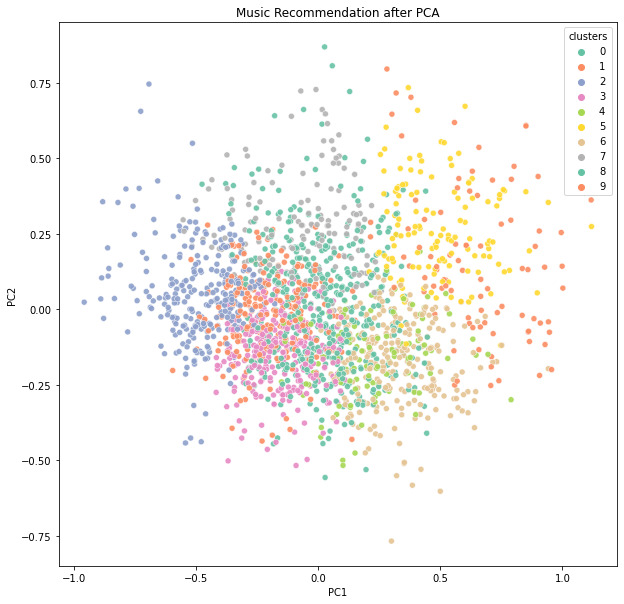

In [76]:
#RESULTS Analysis
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_data,x='PC1',y='PC2',hue='clusters',palette='Set2' , alpha = 0.9)
plt.title('Music Recommendation after PCA')